In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [2]:
print(tf.__version__)

2.2.0-rc4


In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### 建立模型，模型训练

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 1s 4ms/step - loss: 0.4916 - accuracy: 0.8670 - val_loss: 0.2537 - val_accuracy: 0.9300
Epoch 2/10
188/188 [==============================] - 1s 3ms/step - loss: 0.2306 - accuracy: 0.9347 - val_loss: 0.1949 - val_accuracy: 0.9471
Epoch 3/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1745 - accuracy: 0.9499 - val_loss: 0.1625 - val_accuracy: 0.9557
Epoch 4/10
188/188 [==============================] - 1s 3ms/step - loss: 0.1412 - accuracy: 0.9600 - val_loss: 0.1400 - val_accuracy: 0.9603
Epoch 5/10
188/188 [==============================] - 1s 3ms/step - loss: 0.1169 - accuracy: 0.9676 - val_loss: 0.1263 - val_accuracy: 0.9648
Epoch 6/10
188/188 [==============================] - 1s 4ms/step - loss: 0.0986 - accuracy: 0.9722 - val_loss: 0.1172 - val_accuracy: 0.9666
Epoch 7/10
188/188 [==============================] - 1s 4ms/step - loss: 0.0866 - accuracy: 0.9754 - val_loss: 0.1058 - val_accuracy: 0.9687
Epoch 

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [10]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [11]:
accuracy_score(y_test, y_pred)

0.9741

### 可视化

In [0]:
import matplotlib.pyplot as plt

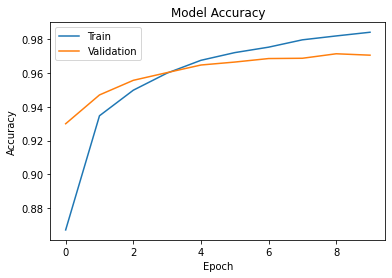

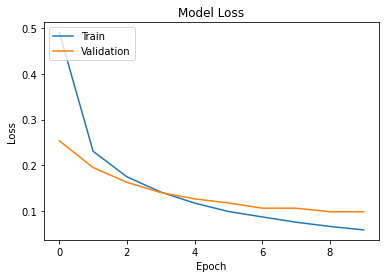

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [0]:
# 混淆矩阵
from mlxtend.plotting import plot_confusion_matrix

In [0]:
import matplotlib

In [0]:
class_names=['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fad60cfc860>)

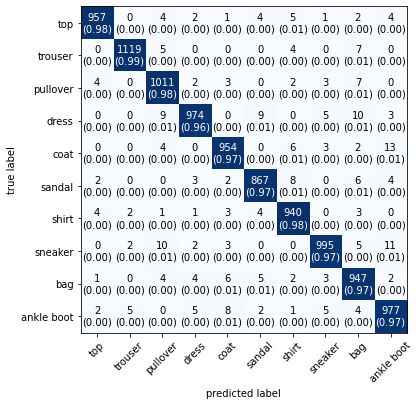

In [17]:
mat = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(mat, figsize=(6,6), show_normed=True, class_names = class_names)